# 

Домашнее задание

Работаем с датасетом про дорожные знаки.

https://www.kaggle.com/datasets/valentynsichkar/traffic-signs-preprocessed/data

В первых двух задачах берем только файл train.pickle и можно подгрузить labels_names.csv

Данные можно прочитать через `pd.read_pickle`

In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Easy

Скачать датасет, обучить логистическую регрессию, измерить качество.

Текстом кратко обосновать какую метрику выбираем и почему такую.

Какой вид дорожных знаков модель путает чаще всего?

In [2]:
data = pd.read_pickle('../data/train.pickle')
x = data['features']
y = data['labels']

In [3]:
x = x.reshape(x.shape[0], -1)

In [4]:
x.shape

(34799, 3072)

In [5]:
y.shape

(34799,)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
model = LogisticRegression(max_iter=100)
model.fit(x_train, y_train)
pred = model.predict(x_test)

/home/iulia/miniconda3/envs/my-environment/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
accuracy = balanced_accuracy_score(y_test, pred)
rep = classification_report(y_test, pred)

In [8]:
print(accuracy)

0.9100270923059286


In [9]:
print(rep)

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        40
           1       0.90      0.89      0.90       501
           2       0.91      0.91      0.91       531
           3       0.89      0.85      0.87       288
           4       0.89      0.93      0.91       457
           5       0.84      0.87      0.85       413
           6       0.92      0.93      0.93        90
           7       0.87      0.92      0.89       332
           8       0.91      0.88      0.90       305
           9       0.96      0.95      0.95       310
          10       0.98      0.97      0.97       463
          11       0.93      0.91      0.92       292
          12       0.99      0.98      0.98       486
          13       0.97      0.96      0.96       492
          14       0.98      0.98      0.98       168
          15       0.90      0.91      0.91       123
          16       0.97      0.96      0.96        99
          17       0.98    

In [10]:
matrix = confusion_matrix(y_test, pred)

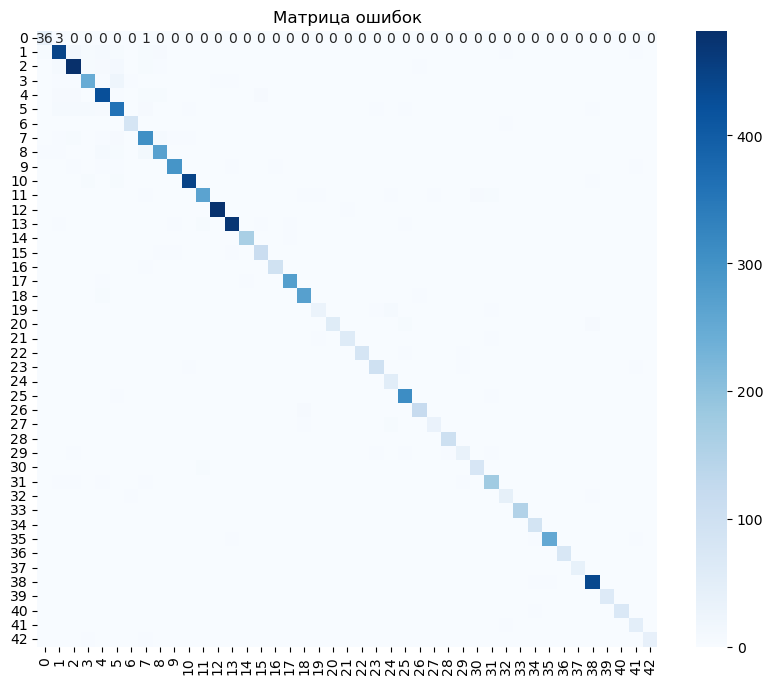

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок')
plt.show()

Большинство ошибок в первых 13 пунктах, половина из которых отвечает за знаки скорости а остальные - похожие на них.

## Medium

Обучить и сравнить между собой:

- логистическая регрессия
- kNN
- НБК
- SVM (попробовать 3 разных ядра)

Какая модель отработала лучше, а какая хуже всех?

Проинтерпретируйте почему худшая модель именно эта.

In [12]:
#kNN
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)
accuracy2 = accuracy_score(y_test, knn_pred)

In [13]:
#НБК
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_pred = nb_model.predict(x_test)
accuracy3 = accuracy_score(y_test, nb_pred)

In [14]:
# SVM
svm_linear_model = SVC(kernel='linear', max_iter=20)
svm_linear_model.fit(x_train, y_train)
svm_linear_pred = svm_linear_model.predict(x_test)
accuracy4_1 = accuracy_score(y_test, svm_linear_pred)

/home/iulia/miniconda3/envs/my-environment/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [15]:
svm_poly_model = SVC(kernel='poly', max_iter=20)
svm_poly_model.fit(x_train, y_train)
svm_poly_pred = svm_poly_model.predict(x_test)
accuracy4_2 = accuracy_score(y_test, svm_poly_pred)

/home/iulia/miniconda3/envs/my-environment/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [16]:
svm_rbf_model = SVC(kernel='rbf', max_iter=20)
svm_rbf_model.fit(x_train, y_train)
svm_rbf_pred = svm_rbf_model.predict(x_test)
accuracy4_3 = accuracy_score(y_test, svm_rbf_pred)

/home/iulia/miniconda3/envs/my-environment/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [17]:
# Оценка результатов
accuracies = {
    "Logistic Regression": accuracy,
    "kNN": accuracy2,
    "Naive Bayes": accuracy3,
    "SVM (Linear Kernel)": accuracy4_1,
    "SVM (Polynomial Kernel)": accuracy4_2,
    "SVM (RBF Kernel)": accuracy4_3
}

print("Accuracy по моделям:")
for model, accuracy in accuracies.items():
    print(f"{model}: {accuracy}")

Accuracy по моделям:
Logistic Regression: 0.9100270923059286
kNN: 0.8705747126436781
Naive Bayes: 0.16666666666666666
SVM (Linear Kernel): 0.47045977011494255
SVM (Polynomial Kernel): 0.05862068965517241
SVM (RBF Kernel): 0.13528735632183908


Хуже всего отработали SVM Polynomial и RBF (так как все знаки достаточно похожи между собой)

По той же причине плохо работает Naive Bayes(признаки не независимы).